In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report

In [3]:
data = pd.read_csv('/Users/haddock_ana/Ironhack/final_project/Data/wine_analysis/wines_individual_grapes.csv')

In [8]:
data.drop(columns= ['Unnamed: 0.1','Unnamed: 0'], inplace=True)

In [20]:
clima = pd.read_csv('/Users/haddock_ana/Ironhack/final_project/Data/wine_analysis/Data/26_06_clima.csv')

In [22]:
clima.drop(columns= ['Unnamed: 0'], inplace=True)

In [23]:
clima

,RegionName,time,season,tmin,tmax,prcp,snow,pres,tsun,Latitude,Longitude,Country,RegionID
0,Santiago,2018,3.0,11.396629,17.900000,0.000000,0.0,1017.751685,256.908696,41.067500,-83.798075,Chile,2285
1,Santiago,2018,2.0,16.490625,24.810938,0.000000,0.0,1017.285938,292.867467,41.067500,-83.798075,Chile,2285
2,Santiago,2018,0.0,9.054545,15.118182,0.000000,0.0,1029.263636,186.526276,41.067500,-83.798075,Chile,2285
3,Santiago,2019,3.0,10.883146,16.330337,0.000000,0.0,1016.901124,128.487640,41.067500,-83.798075,Chile,2285
4,Santiago,2019,1.0,11.098913,19.128261,0.000000,0.0,1016.690217,377.223913,41.067500,-83.798075,Chile,2285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45854,Four Mile Creek,2023,3.0,6.831461,17.808989,1.782022,0.0,1015.498876,324.489812,42.141854,148.287540,Canada,3084
45855,Four Mile Creek,2023,1.0,9.826087,20.184783,2.557609,0.0,1013.798913,297.427381,42.141854,148.287540,Canada,3084
45856,Four Mile Creek,2023,2.0,17.542553,31.819149,0.779787,0.0,1014.488298,287.632637,42.141854,148.287540,Canada,3084
45857,Four Mile Creek,2023,0.0,1.845556,12.011111,0.765556,0.0,1018.051111,303.393869,42.141854,148.287540,Canada,3084


In [24]:
combined_df = pd.merge(clima, data, on='RegionID')
combined_df.head()

,RegionName_x,time,season,tmin,tmax,prcp,snow,pres,tsun,Latitude,...,Grapes,ABV,Body,Acidity,Code,Country_y,RegionName_y,WineryID,WineryName,Grape
0,Santiago,2018,3.0,11.396629,17.9,0.0,0.0,1017.751685,256.908696,41.0675,...,"['Cabernet Sauvignon', 'Syrah/Shiraz']",13.5,Full-bodied,Low,CL,Chile,Santiago,39355,Casillero del Diablo,Cabernet Sauvignon
1,Santiago,2018,3.0,11.396629,17.9,0.0,0.0,1017.751685,256.908696,41.0675,...,"['Cabernet Sauvignon', 'Syrah/Shiraz']",13.5,Full-bodied,Low,CL,Chile,Santiago,39355,Casillero del Diablo,Syrah/Shiraz
2,Santiago,2018,3.0,11.396629,17.9,0.0,0.0,1017.751685,256.908696,41.0675,...,['Cabernet Sauvignon'],13.5,Full-bodied,High,CL,Chile,Santiago,39355,Casillero del Diablo,Cabernet Sauvignon
3,Santiago,2018,3.0,11.396629,17.9,0.0,0.0,1017.751685,256.908696,41.0675,...,['Carmenère'],13.5,Full-bodied,High,CL,Chile,Santiago,39355,Casillero del Diablo,Carmenère
4,Santiago,2018,3.0,11.396629,17.9,0.0,0.0,1017.751685,256.908696,41.0675,...,['Cabernet Sauvignon'],13.0,Full-bodied,High,CL,Chile,Santiago,39456,Concha y Toro,Cabernet Sauvignon


In [25]:
combined_df.columns

Index(['RegionName_x', 'time', 'season', 'tmin', 'tmax', 'prcp', 'snow',
       'pres', 'tsun', 'Latitude', 'Longitude', 'Country_x', 'RegionID',
       'WineID', 'WineName', 'Type', 'Elaborate', 'Grapes', 'ABV', 'Body',
       'Acidity', 'Code', 'Country_y', 'RegionName_y', 'WineryID',
       'WineryName', 'Grape'],
      dtype='object')

In [27]:
combined_df.drop(columns=['RegionName_x'], inplace=True)

In [29]:
combined_df.tail()

,time,season,tmin,tmax,prcp,snow,pres,tsun,Latitude,Longitude,...,Grapes,ABV,Body,Acidity,Code,Country_y,RegionName_y,WineryID,WineryName,Grape
4129441,2024,0.0,1.0,13.0,0.0,0.0,1015.5,317.768159,42.141854,148.28754,...,['Pinot Gris'],13.0,Medium-bodied,High,CA,Canada,Four Mile Creek,65866,Coyote's Run,Pinot Gris
4129442,2024,0.0,1.0,13.0,0.0,0.0,1015.5,317.768159,42.141854,148.28754,...,['Cabernet Franc'],13.5,Medium-bodied,High,CA,Canada,Four Mile Creek,66164,Between The Lines,Cabernet Franc
4129443,2024,0.0,1.0,13.0,0.0,0.0,1015.5,317.768159,42.141854,148.28754,...,['Chardonnay'],13.0,Full-bodied,High,CA,Canada,Four Mile Creek,65866,Coyote's Run,Chardonnay
4129444,2024,0.0,1.0,13.0,0.0,0.0,1015.5,317.768159,42.141854,148.28754,...,['Cabernet Franc'],10.5,Medium-bodied,High,CA,Canada,Four Mile Creek,65866,Coyote's Run,Cabernet Franc
4129445,2024,0.0,1.0,13.0,0.0,0.0,1015.5,317.768159,42.141854,148.28754,...,['Gamay Noir'],14.1,Medium-bodied,High,CA,Canada,Four Mile Creek,66097,Marynissen Estates,Gamay Noir


In [38]:
model_df = combined_df[['time', 'season', 'tmin', 'tmax', 'prcp', 'snow',
       'pres', 'tsun', 'Latitude', 'Longitude', 'Type', 'ABV', 'Body',
       'Acidity']]

In [40]:
model_df.drop_duplicates(inplace=True)

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_37638/2527124917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.drop_duplicates(inplace=True)


In [66]:
model_df.to_csv('model_df_1.csv')

In [41]:
model_df

,time,season,tmin,tmax,prcp,snow,pres,tsun,Latitude,Longitude,Type,ABV,Body,Acidity
0,2018,3.0,11.396629,17.9,0.0,0.0,1017.751685,256.908696,41.067500,-83.798075,Red,13.5,Full-bodied,Low
2,2018,3.0,11.396629,17.9,0.0,0.0,1017.751685,256.908696,41.067500,-83.798075,Red,13.5,Full-bodied,High
4,2018,3.0,11.396629,17.9,0.0,0.0,1017.751685,256.908696,41.067500,-83.798075,Red,13.0,Full-bodied,High
6,2018,3.0,11.396629,17.9,0.0,0.0,1017.751685,256.908696,41.067500,-83.798075,Red,14.0,Full-bodied,High
7,2018,3.0,11.396629,17.9,0.0,0.0,1017.751685,256.908696,41.067500,-83.798075,Red,13.5,Medium-bodied,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129441,2024,0.0,1.000000,13.0,0.0,0.0,1015.500000,317.768159,42.141854,148.287540,White,13.0,Medium-bodied,High
4129442,2024,0.0,1.000000,13.0,0.0,0.0,1015.500000,317.768159,42.141854,148.287540,Red,13.5,Medium-bodied,High
4129443,2024,0.0,1.000000,13.0,0.0,0.0,1015.500000,317.768159,42.141854,148.287540,White,13.0,Full-bodied,High
4129444,2024,0.0,1.000000,13.0,0.0,0.0,1015.500000,317.768159,42.141854,148.287540,Red,10.5,Medium-bodied,High


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, classification_report


model_df = combined_df[['time', 'season', 'tmin', 'tmax', 'prcp', 'snow',
       'pres', 'tsun', 'Latitude', 'Longitude', 'Type', 'ABV', 'Body',
       'Acidity']]


X = model_df.drop(columns=['ABV', 'Body', 'Acidity'])
y_abv = model_df['ABV']
y_body = model_df['Body']
y_acidity = model_df['Acidity']


X_train, X_test, y_train_abv, y_test_abv = train_test_split(X, y_abv, test_size=0.2, random_state=42)
_, _, y_train_body, y_test_body = train_test_split(X, y_body, test_size=0.2, random_state=42)
_, _, y_train_acidity, y_test_acidity = train_test_split(X, y_acidity, test_size=0.2, random_state=42)


numeric_features = ['time', 'season', 'tmin', 'tmax', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude']
categorical_features = ['Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


regressor_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

classifier_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])


regressor_pipeline.fit(X_train, y_train_abv)
y_pred_abv = regressor_pipeline.predict(X_test)
mse_abv = mean_squared_error(y_test_abv, y_pred_abv)
print(f"MSE for ABV: {mse_abv}")

classifier_pipeline.fit(X_train, y_train_body)
y_pred_body = classifier_pipeline.predict(X_test)
print(classification_report(y_test_body, y_pred_body))

classifier_pipeline.fit(X_train, y_train_acidity)
y_pred_acidity = classifier_pipeline.predict(X_test)
print(classification_report(y_test_acidity, y_pred_acidity))

MSE for ABV: 0.9361792982227419
                   precision    recall  f1-score   support

      Full-bodied       0.80      0.86      0.83    398702
     Light-bodied       0.72      0.72      0.72     71759
    Medium-bodied       0.79      0.76      0.78    267450
 Very full-bodied       0.77      0.58      0.66     80615
Very light-bodied       0.70      0.83      0.76      7364

         accuracy                           0.79    825890
        macro avg       0.76      0.75      0.75    825890
     weighted avg       0.79      0.79      0.79    825890

              precision    recall  f1-score   support

        High       0.90      0.96      0.93    663846
         Low       0.54      0.08      0.15     22406
      Medium       0.74      0.59      0.66    139638

    accuracy                           0.87    825890
   macro avg       0.73      0.54      0.58    825890
weighted avg       0.86      0.87      0.86    825890



•	precision: Proporción de verdaderos positivos sobre todos los ejemplos que el clasificador marcó como positivos.

•	Full-bodied: 0.80 de los vinos clasificados como Full-bodied son realmente Full-bodied.

•	Light-bodied: 0.72 de los vinos clasificados como Light-bodied son realmente Light-bodied.

•	recall: Proporción de verdaderos positivos sobre todos los ejemplos que son realmente positivos.

•	Full-bodied: 0.86 de los vinos realmente Full-bodied fueron correctamente identificados.

•	Light-bodied: 0.72 de los vinos realmente Light-bodied fueron correctamente identificados.

•	f1-score: Media armónica de precisión y recall, proporcionando un balance entre ambos.

•	Full-bodied: F1-score de 0.83 indica un buen equilibrio entre precisión y recall.

•	Light-bodied: F1-score de 0.72 indica un balance aceptable entre precisión y recall.

•	support: Número de ocurrencias de cada etiqueta en los datos de prueba.

•	Full-bodied: 398702 ejemplos.

•	Light-bodied: 71759 ejemplos.

3. Métricas Globales

	•	accuracy: Proporción de predicciones correctas en general. Aquí, el modelo tiene una precisión de 0.79, lo que significa que el 79% de las predicciones son correctas.
	•	macro avg: Promedio no ponderado de precisión, recall y f1-score. No tiene en cuenta la cantidad de cada clase.
	•	weighted avg: Promedio ponderado de precisión, recall y f1-score, teniendo en cuenta la cantidad de cada clase.

Conclusiones

1. ABV Prediction (Regresión):
	•	MSE de 0.936 indica que el modelo de regresión tiene un error medio cuadrado relativamente bajo. Esto sugiere que el modelo predice el contenido de alcohol con una precisión razonable, pero hay espacio para mejorar.
2.	Body Prediction (Clasificación):
	•	Full-bodied y Medium-bodied tienen altos valores de precisión y recall, lo que sugiere que el modelo es bastante bueno prediciendo estas categorías.
	•	Very full-bodied tiene un f1-score más bajo, indicando que el modelo tiene dificultades para predecir correctamente esta categoría en comparación con las otras.
	•	Light-bodied y Very light-bodied también muestran resultados aceptables, pero podrían mejorarse.
3.	Overall Model Performance:
	•	Con una accuracy del 79%, el modelo de clasificación tiene un rendimiento razonable en general, pero hay margen para mejorar, especialmente en la categoría Very full-bodied.

•	precision: Proporción de verdaderos positivos sobre todos los ejemplos que el clasificador marcó como positivos.
	•	High: 0.90 de los vinos clasificados como High son realmente High.
	•	Low: 0.54 de los vinos clasificados como Low son realmente Low.
	•	Medium: 0.74 de los vinos clasificados como Medium son realmente Medium.
•	recall: Proporción de verdaderos positivos sobre todos los ejemplos que son realmente positivos.
	•	High: 0.96 de los vinos realmente High fueron correctamente identificados.
	•	Low: 0.08 de los vinos realmente Low fueron correctamente identificados.
	•	Medium: 0.59 de los vinos realmente Medium fueron correctamente identificados.
•	f1-score: Media armónica de precisión y recall, proporcionando un balance entre ambos.
	•	High: F1-score de 0.93 indica un buen equilibrio entre precisión y recall.
	•	Low: F1-score de 0.15 indica que el modelo tiene dificultades significativas para predecir correctamente los vinos de baja acidez.
	•	Medium: F1-score de 0.66 indica un equilibrio razonable entre precisión y recall.
•	support: Número de ocurrencias de cada etiqueta en los datos de prueba.
	•	High: 663846 ejemplos.
	•	Low: 22406 ejemplos.
	•	Medium: 139638 ejemplos.

Conclusiones

1.	Predicción de Acidity (Clasificación):
	•	High tiene altos valores de precisión y recall, lo que sugiere que el modelo es bastante bueno prediciendo esta categoría.
	•	Low tiene un f1-score muy bajo, indicando que el modelo tiene dificultades significativas para predecir correctamente esta categoría. Esto puede deberse al bajo soporte (número de ejemplos) en comparación con otras clases.
	•	Medium muestra resultados aceptables, pero también podría mejorarse.
2.	Overall Model Performance:
	•	Con una accuracy del 87%, el modelo de clasificación tiene un rendimiento razonable en general, pero hay margen para mejorar, especialmente en la categoría Low.


<Figure size 1400x700 with 0 Axes>

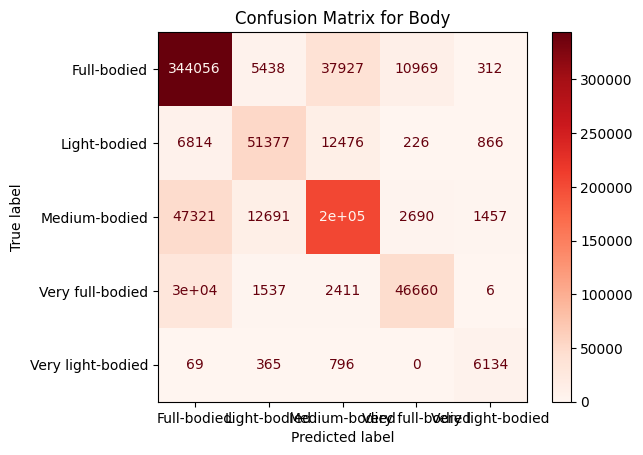

<Figure size 1200x600 with 0 Axes>

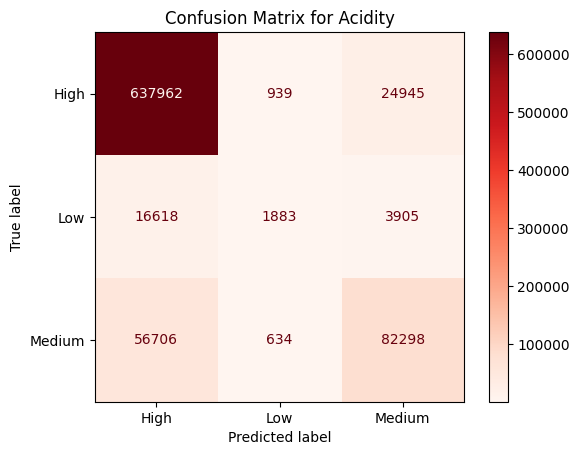

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusión para Body
plt.figure(figsize=(14, 7))
ConfusionMatrixDisplay.from_predictions(y_test_body, y_pred_body, display_labels=['Full-bodied', 'Light-bodied', 'Medium-bodied', 'Very full-bodied', 'Very light-bodied'], cmap='Reds')
plt.title('Confusion Matrix for Body')
plt.show()

# Matriz de confusión para Acidity
plt.figure(figsize=(12, 6))
ConfusionMatrixDisplay.from_predictions(y_test_acidity, y_pred_acidity, display_labels=['High', 'Low', 'Medium'], cmap='Reds')
plt.title('Confusion Matrix for Acidity')
plt.show()

permiten evaluar el rendimiento de un modelo de clasificación. En nuestros análisis, tenemos dos matrices de confusión: una para la predicción de Body y otra para Acidity.

•	Eje X: Clases predichas (Full-bodied, Light-bodied, Medium-bodied, Very full-bodied, Very light-bodied).
•	Eje Y: Clases verdaderas.
•	Un alto valor en la diagonal principal (de arriba a la izquierda a abajo a la derecha) indica una buena precisión del modelo, ya que significa que muchas predicciones son correctas.

Conclusiones Generales

•	Modelo de Body:
	•	El modelo tiene un buen rendimiento general con una precisión y recall razonables para la mayoría de las clases, aunque necesita mejoras para las clases Very full-bodied y Light-bodied.
	•	La precisión y el recall son equilibrados, lo que indica que el modelo no solo predice correctamente sino que también identifica la mayoría de los casos correctamente.


•	Modelo de Acidity:
	•	El modelo es muy efectivo para clasificar vinos con alta acidez, pero tiene dificultades con las clases Low y Medium.
	•	La clase Low en particular tiene una tasa de recall muy baja, lo que significa que el modelo no está identificando correctamente la mayoría de los vinos con baja acidez.

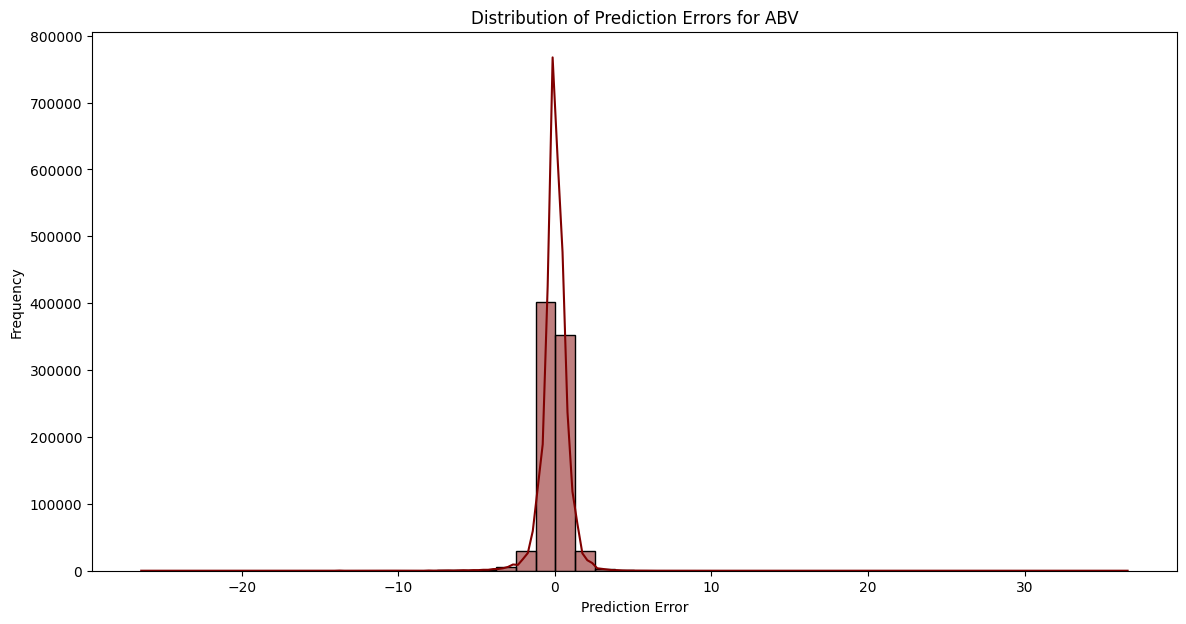

In [49]:
error_abv = y_test_abv - y_pred_abv
granate_palette = sns.color_palette(["#800000", "#a52a2a", "#b22222", "#b03060", "#cd5c5c"])
plt.figure(figsize=(14, 7))
sns.histplot(error_abv, bins=50, kde=True, color=granate_palette[0])
plt.title('Distribution of Prediction Errors for ABV')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

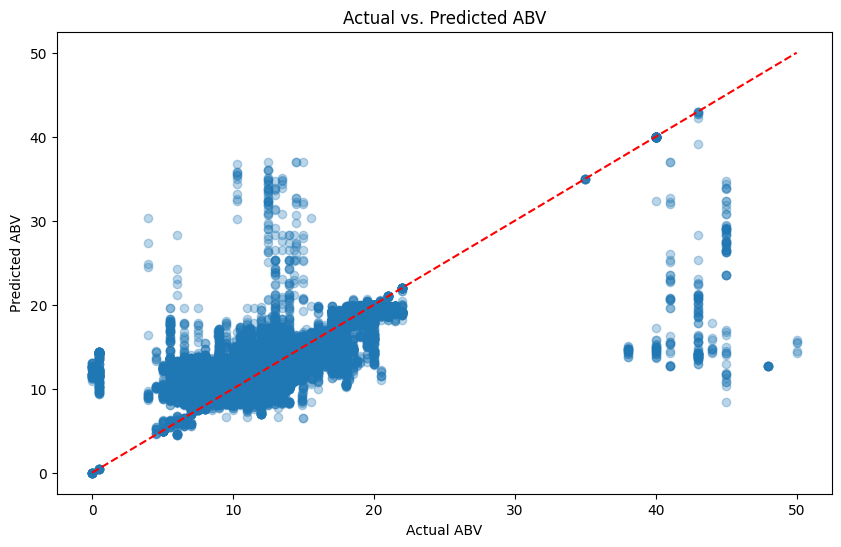

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_test_abv, y_pred_abv, alpha=0.3)
plt.plot([min(y_test_abv), max(y_test_abv)], [min(y_test_abv), max(y_test_abv)], 'r--')
plt.xlabel('Actual ABV')
plt.ylabel('Predicted ABV')
plt.title('Actual vs. Predicted ABV')
plt.show()

Considerar características adicionales o ingeniería de características para mejorar el rendimiento.

•	Clase Low: Incrementar los datos de entrenamiento para la clase Low o utilizar técnicas de sobremuestreo (SMOTE) para balancear el conjunto de datos.

•	Modelo: Experimentar con diferentes algoritmos de clasificación o ajustar hiperparámetros del modelo actual para mejorar el rendimiento.

El objetivo de esta sección es analizar los resultados de la validación cruzada para determinar el número óptimo de estimadores en el modelo de RandomForestRegressor. Una curva de validación cruzada nos permite visualizar cómo varía el rendimiento del modelo (medido por el error cuadrático medio) a medida que cambiamos el número de estimadores.

python(46342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(46343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(46344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(46345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(46346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(46347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(46348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(46349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Mean Squared Error (Linear Regression): 1.3411120686252431
Mean Squared Error (Decision Tree Regressor): 1.1611829628915649
Execution time: 3.09 minutes


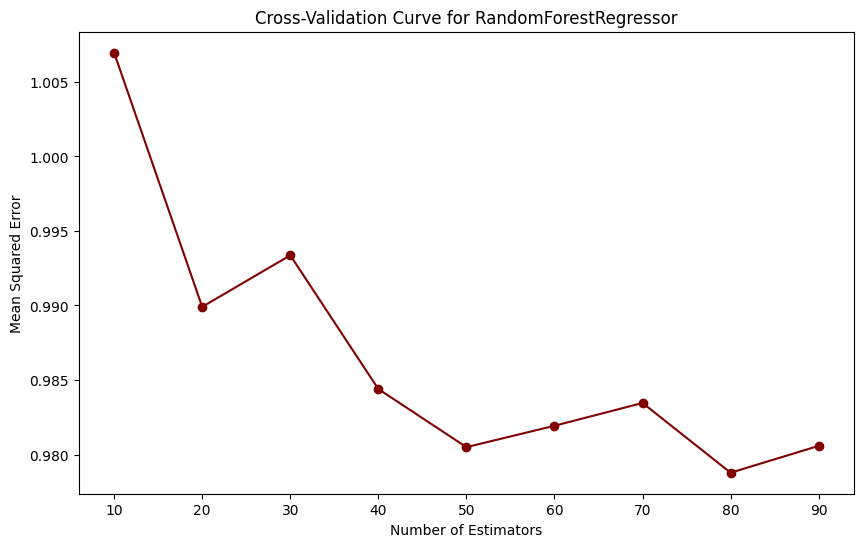

In [59]:
import time
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X_sample = X_train.sample(frac=0.1, random_state=42)
y_sample = y_train_abv.sample(frac=0.1, random_state=42)


model_linear = LinearRegression()
model_tree = DecisionTreeRegressor()


pipeline_linear = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler()), ('regressor', model_linear)])
scores_linear = cross_val_score(pipeline_linear, X_sample, y_sample, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)


pipeline_tree = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler()), ('regressor', model_tree)])
scores_tree = cross_val_score(pipeline_tree, X_sample, y_sample, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

print(f"Mean Squared Error (Linear Regression): {-scores_linear.mean()}")
print(f"Mean Squared Error (Decision Tree Regressor): {-scores_tree.mean()}")


estimators_range = range(10, 100, 10) 
cv_scores = []

start_time = time.time()

for n_estimators in estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler()), ('regressor', model)])
    scores = cross_val_score(pipeline, X_sample, y_sample, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)  # Reducir a 3 pliegues
    cv_scores.append(-scores.mean())

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time / 60:.2f} minutes")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, cv_scores, marker='o', color='maroon')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Curve for RandomForestRegressor')
plt.show()

El objetivo de esta sección es evaluar diferentes modelos de machine learning para predecir el contenido de alcohol (ABV) de los vinos en función de diversas variables climáticas y características del vino. He utilizado modelos de regresión lineal y árboles de decisión.

Resultados de la Evaluación de Modelos

Hemos calculado el error cuadrático medio (Mean Squared Error, MSE) para cada modelo. Este es un indicador de la precisión de los modelos, donde un valor más bajo indica un mejor rendimiento.

	•	Mean Squared Error (Linear Regression): 1.3411120686252431
	•	Mean Squared Error (Decision Tree Regressor): 1.1611829628915649

El modelo de árbol de decisión muestra un menor error cuadrático medio en comparación con el modelo de regresión lineal, lo que indica que el árbol de decisión tiene un mejor rendimiento en la predicción del ABV.

Para comprender mejor cómo las diferentes características afectan la predicción del ABV, hemos visualizado la importancia de las características utilizando el modelo de árbol de decisión.

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_37638/2893075017.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette=granate_palette)
/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_37638/2893075017.py:16: UserWarning: 
The palette list has fewer values (6) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=importances, y=feature_names, palette=granate_palette)


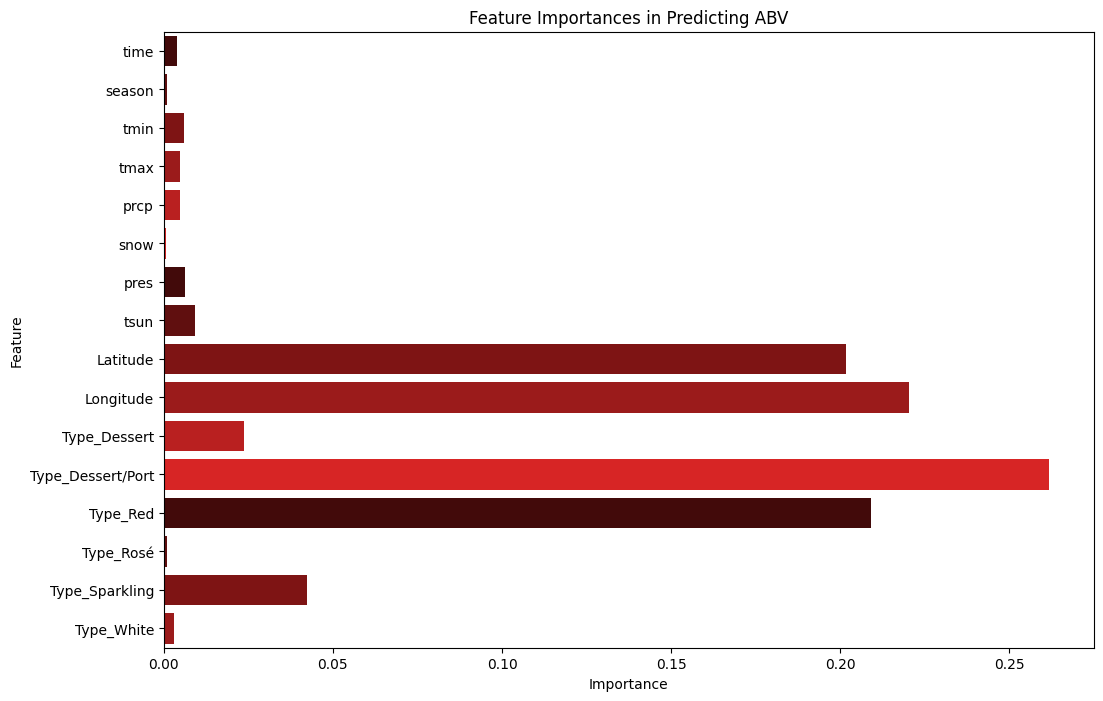

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


granate_palette = [
    '#4B0101', 
    '#6D0202', 
    '#8F0303', 
    '#B10505', 
    '#D30606',
    '#F50707'  
]

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names, palette=granate_palette)
plt.title('Feature Importances in Predicting ABV')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Conclusiones

1.	Modelos y Resultados:
	•	El árbol de decisión superó a la regresión lineal en la predicción del contenido de alcohol (ABV) de los vinos, como lo indica el menor error cuadrático medio.
    
	•	La diferencia en los resultados sugiere que las relaciones no lineales en los datos pueden ser capturadas más efectivamente por el árbol de decisión.


2.	Importancia de las Características:
	•	La visualización de la importancia de las características nos permite identificar cuáles son los factores climáticos y características del vino que tienen un mayor impacto en la predicción del ABV.


Próximos Pasos

	•	Optimización de Modelos: Continuar ajustando y optimizando los hiperparámetros de los modelos para mejorar aún más el rendimiento.

	•	Validación Cruzada: Implementar técnicas de validación cruzada para asegurar la robustez de los modelos.

La curva de validación cruzada nos permite identificar el número óptimo de estimadores que minimiza el error cuadrático medio (MSE). En este caso, parece que el MSE se estabiliza y es más bajo cuando el número de estimadores es inferior a 20.

Conclusiones

1.	Número Óptimo de Estimadores:
	•	El gráfico indica que el rendimiento del modelo mejora al aumentar el número de estimadores hasta cierto punto. Después de aproximadamente 10-20 estimadores, el MSE se estabiliza.
	•	Esto sugiere que un número de estimadores alrededor de 10-20 es óptimo para este conjunto de datos, ya que más estimadores no proporcionan una mejora significativa en el rendimiento.
2.	Implementación de Modelos con Estimadores Óptimos:
	•	Basándonos en estos resultados, podemos ajustar nuestro modelo de RandomForestRegressor utilizando un número de estimadores cercano a 10-20 para balancear el rendimiento y el tiempo de cómputo.


Próximos Pasos

•	Ajuste Fino: Refinar aún más el número de estimadores dentro del rango óptimo (10-20) utilizando técnicas de búsqueda de hiperparámetros como GridSearchCV.

•	Evaluación Adicional: Evaluar otros parámetros del modelo que puedan influir en su rendimiento, como la profundidad del árbol y el número mínimo de muestras por hoja.

In [60]:

optimal_estimators = 15  

final_model = RandomForestRegressor(n_estimators=optimal_estimators)
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler()), ('regressor', final_model)])

final_pipeline.fit(X_train, y_train_abv)
y_pred_final = final_pipeline.predict(X_test)
final_mse = mean_squared_error(y_test_abv, y_pred_final)

print(f"Final MSE with {optimal_estimators} estimators: {final_mse}")

Final MSE with 15 estimators: 0.9382078995573013


In [61]:
optimal_estimators = 25  

final_model = RandomForestRegressor(n_estimators=optimal_estimators)
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler()), ('regressor', final_model)])

final_pipeline.fit(X_train, y_train_abv)
y_pred_final = final_pipeline.predict(X_test)
final_mse = mean_squared_error(y_test_abv, y_pred_final)

print(f"Final MSE with {optimal_estimators} estimators: {final_mse}")

Final MSE with 25 estimators: 0.9360519464814762


In [62]:
optimal_estimators = 50  

final_model = RandomForestRegressor(n_estimators=optimal_estimators)
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler()), ('regressor', final_model)])

final_pipeline.fit(X_train, y_train_abv)
y_pred_final = final_pipeline.predict(X_test)
final_mse = mean_squared_error(y_test_abv, y_pred_final)

print(f"Final MSE with {optimal_estimators} estimators: {final_mse}")

Final MSE with 50 estimators: 0.9348329514394025


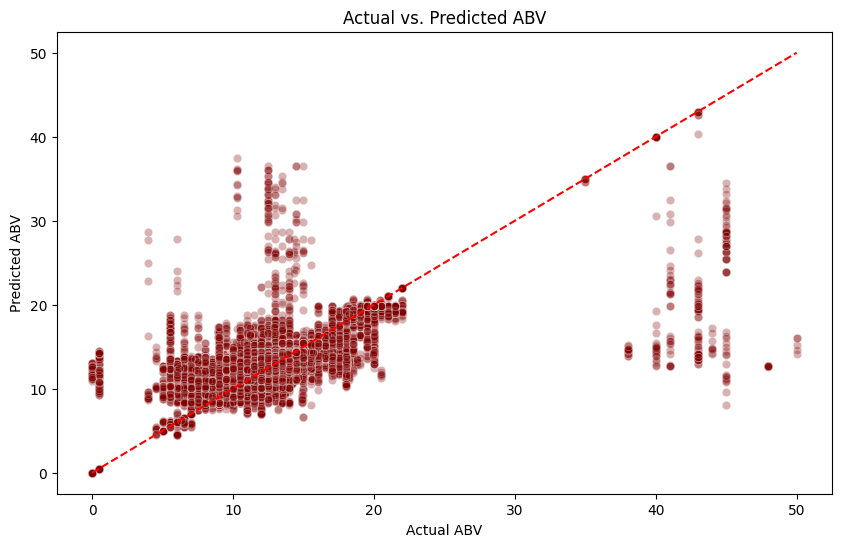

In [64]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_abv, y=y_pred_final, alpha=0.3, color='maroon')
plt.plot([min(y_test_abv), max(y_test_abv)], [min(y_test_abv), max(y_test_abv)], 'r--')
plt.xlabel('Actual ABV')
plt.ylabel('Predicted ABV')
plt.title('Actual vs. Predicted ABV')
plt.show()